# Canadian AI Figures

In [6]:
import os 

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [7]:
sns.set_style("white")
sns.set_context("poster")

In [8]:
clf_dir = "/Users/jimuelcelestejr/Documents/codebook/MLSpeech4MH/results/TAUKADIAL2024/machine_learning/classification"

features = {
    "egemaps_classification": "eGeMAPS Acoustic Features", 
    "lftk_classification": "LFTK Linguistic Features", 
    "egemaps_lftk_classification": "eGeMAPS + LFTK Features"
}

models = {
    "random_forest_classifier": "RF", 
    "svm_classifier": "SVC", 
    "logistic_regression_classifier": "LogR", 
    "xgb_classifier": "XGB"
}


features_perf1 = {}
for feature in features:
    models_perf = {}
    for model in models:
        path = os.path.join(clf_dir, feature, model, "performance.csv")
        perf = pd.read_csv(path)
        uar = perf['sensitivity_score'][0:5]
        # print(path)
        # print(perf)
        # print(uar)
        models_perf[model] = uar
    models_perf = pd.DataFrame.from_dict(models_perf)
    models_perf = models_perf.rename(columns=models)
    features_perf1[feature] = models_perf

features_perf1

{'egemaps_classification':          RF       SVC      LogR       XGB
 0  0.770833  0.791667  0.625000  0.770833
 1  0.972222  0.861111  0.722222  0.777778
 2  0.416667  0.555556  0.500000  0.472222
 3  0.803922  0.607843  0.705882  0.764706
 4  0.607843  0.647059  0.588235  0.666667,
 'lftk_classification':          RF       SVC      LogR       XGB
 0  0.479167  0.645833  0.375000  0.500000
 1  0.861111  0.138889  0.666667  0.777778
 2  0.638889  0.611111  0.500000  0.638889
 3  0.705882  0.215686  0.666667  0.666667
 4  0.588235  0.705882  0.450980  0.490196,
 'egemaps_lftk_classification':          RF       SVC      LogR       XGB
 0  0.750000  0.958333  0.625000  0.666667
 1  0.944444  0.888889  0.805556  0.861111
 2  0.638889  0.500000  0.500000  0.500000
 3  0.862745  0.784314  0.725490  0.784314
 4  0.705882  0.843137  0.549020  0.647059}

In [9]:
clf_dir = "/Users/jimuelcelestejr/Documents/codebook/MLSpeech4MH/results/TAUKADIAL2024/machine_learning/classification_leakage"

features_perf2 = {}
for feature in features:
    models_perf = {}
    for model in models:
        path = os.path.join(clf_dir, feature, model, "performance.csv")
        perf = pd.read_csv(path)
        uar = perf['sensitivity_score'][0:5]
        # print(path)
        # print(perf)
        # print(uar)
        models_perf[model] = uar
    models_perf = pd.DataFrame.from_dict(models_perf)
    models_perf = models_perf.rename(columns=models)
    features_perf2[feature] = models_perf

features_perf2

{'egemaps_classification':          RF       SVC      LogR       XGB
 0  0.866667  0.844444  0.688889  0.866667
 1  0.888889  0.777778  0.600000  0.733333
 2  0.863636  0.931818  0.704545  0.863636
 3  0.931818  0.727273  0.772727  0.931818
 4  0.909091  0.886364  0.590909  0.818182,
 'lftk_classification':          RF       SVC      LogR       XGB
 0  0.688889  0.577778  0.644444  0.644444
 1  0.711111  0.711111  0.622222  0.666667
 2  0.704545  0.568182  0.659091  0.704545
 3  0.727273  0.795455  0.590909  0.704545
 4  0.613636  0.545455  0.568182  0.454545,
 'egemaps_lftk_classification':          RF       SVC      LogR       XGB
 0  0.888889  0.844444  0.622222  0.777778
 1  0.822222  0.755556  0.688889  0.800000
 2  0.863636  0.795455  0.681818  0.818182
 3  0.863636  0.840909  0.681818  0.886364
 4  0.863636  0.772727  0.568182  0.750000}

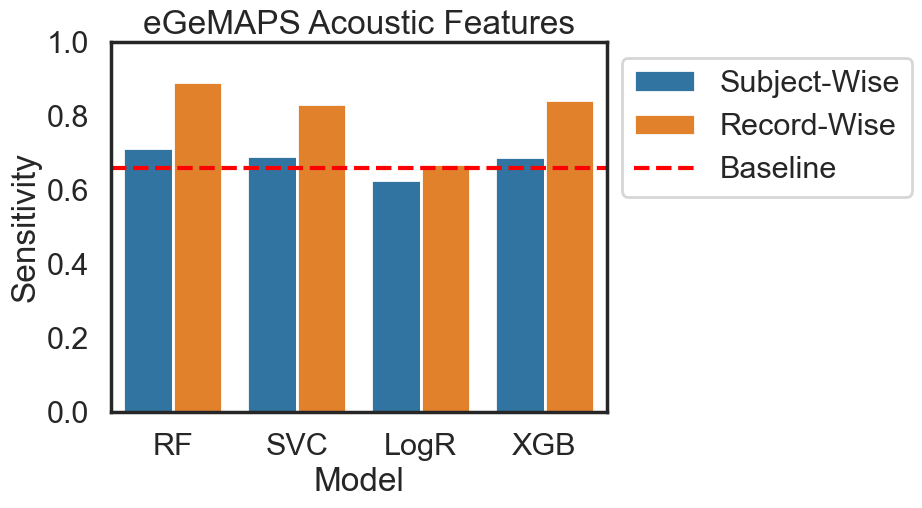

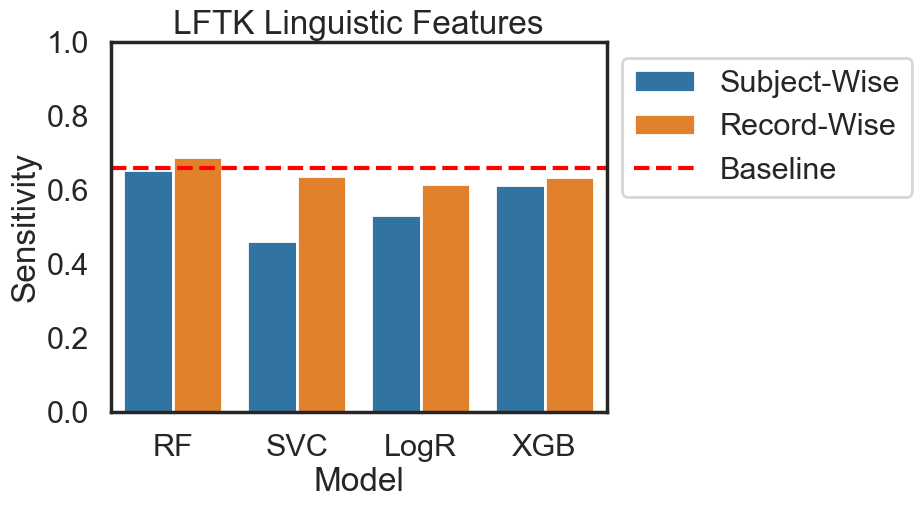

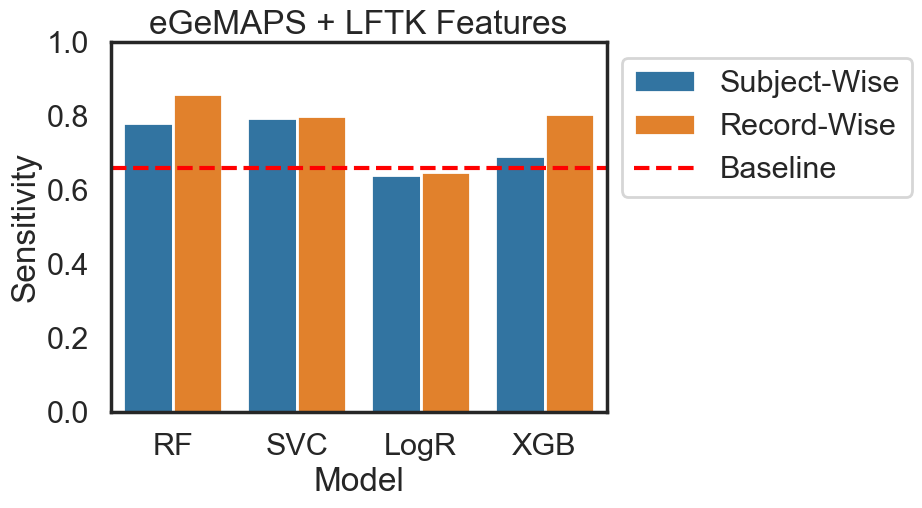

In [10]:
for feature in features_perf2:
    data1 = pd.DataFrame({
        "Sensitivity": features_perf1[feature].mean(), 
        "Std": features_perf1[feature].std(), 
        "Cross-Validation": "Subject-Wise"
    }).reset_index().rename(columns={"index": "Model"})

    data2 = pd.DataFrame({
        "Sensitivity": features_perf2[feature].mean(), 
        "Std": features_perf2[feature].std(), 
        "Cross-Validation": "Record-Wise"
    }).reset_index().rename(columns={"index": "Model"})

    combined_df = pd.concat([data1, data2])

    # plt.figure(feature, (10,10))
    # plt.figure(figsize=(12, 10))
    plt.figure()
    plt.title(features[feature])
    plt.ylim((0,1))
    # sns.despine()
    ax = sns.barplot(x='Model', y='Sensitivity', hue='Cross-Validation', data=combined_df)
    plt.axhline(y=0.66, color='r', linestyle='--', label='Baseline')
    plt.legend()
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.savefig(feature + "_sensitivity_leak.jpg", dpi=300, transparent=True, bbox_inches='tight')
    plt.show()

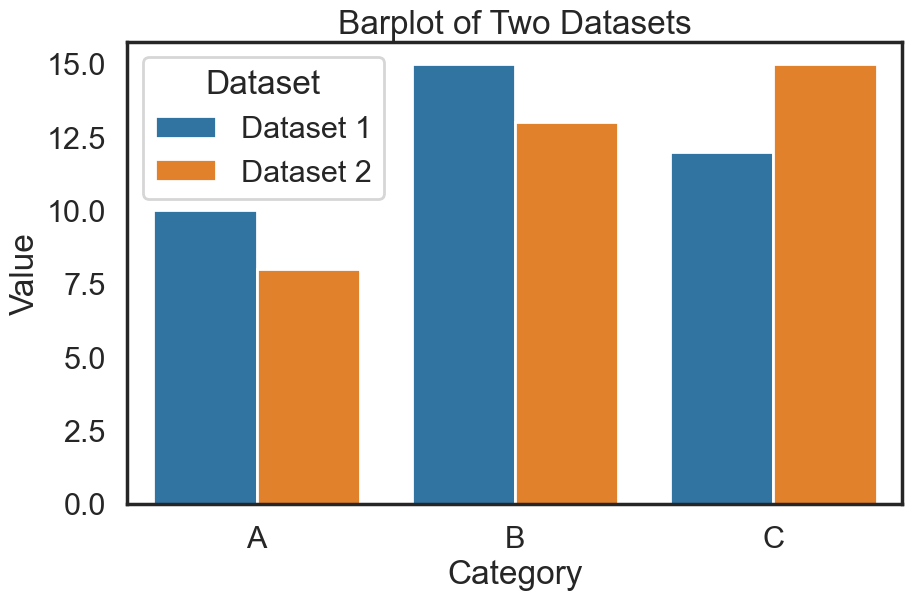

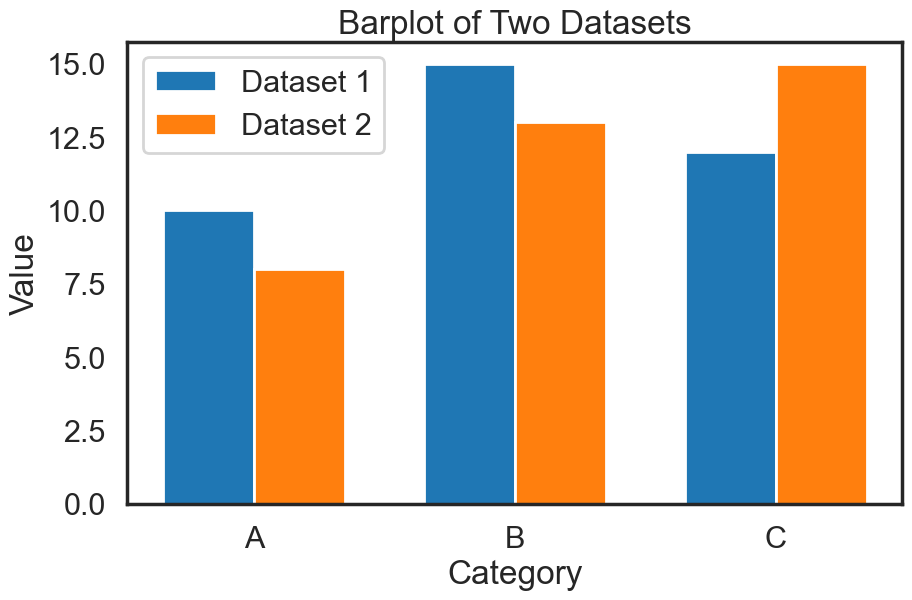

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample datasets
data1 = {'Category': ['A', 'B', 'C'], 'Value': [10, 15, 12]}
data2 = {'Category': ['A', 'B', 'C'], 'Value': [8, 13, 15]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Method 1: Combine DataFrames and use 'hue'
df1['Dataset'] = 'Dataset 1'
df2['Dataset'] = 'Dataset 2'
combined_df = pd.concat([df1, df2])

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Value', hue='Dataset', data=combined_df)
plt.title('Barplot of Two Datasets')
plt.show()

# Method 2: Manual bar positioning using matplotlib
categories = df1['Category']
x = np.arange(len(categories))
width = 0.35  # Width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, df1['Value'], width, label='Dataset 1')
plt.bar(x + width/2, df2['Value'], width, label='Dataset 2')
plt.xticks(x, categories)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Barplot of Two Datasets')
plt.legend()
plt.show()

In [12]:
a = pd.DataFrame.from_dict({
    'Subject-Wise CV': features_perf1['egemaps_classification'].mean(),
    'Record-Wise CV': features_perf2['egemaps_classification'].mean()
}).reset_index().rename(columns={"index": "Model"})
a

,Model,Subject-Wise CV,Record-Wise CV
0,RF,0.714297,0.892020
1,SVC,0.692647,0.833535
2,LogR,0.628268,0.671414
3,XGB,0.690441,0.842727


<Axes: title={'center': 'egemaps'}, ylabel='UAR'>

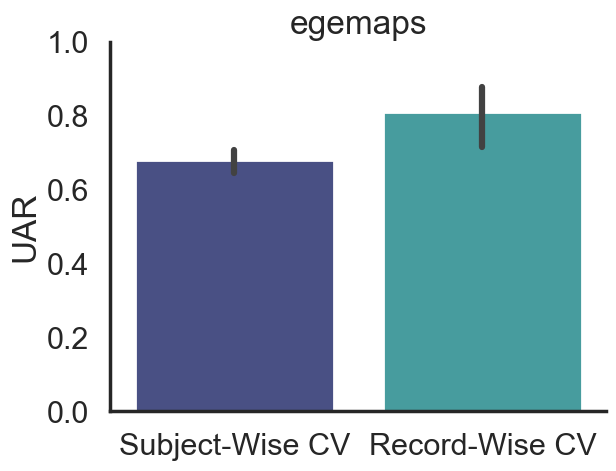

In [13]:
feature = 'egemaps_classification'
a = pd.DataFrame.from_dict({
    'Subject-Wise CV': features_perf1[feature].mean(),
    'Record-Wise CV': features_perf2[feature].mean()
}).reset_index().rename(columns={"index": "Model"})
a

plt.ylim((0.0, 1.0))
plt.ylabel('UAR')
plt.title('egemaps')
sns.despine()
sns.barplot(a,  palette="mako")

<Axes: title={'center': 'LFTK Linguistic Features'}, ylabel='UAR'>

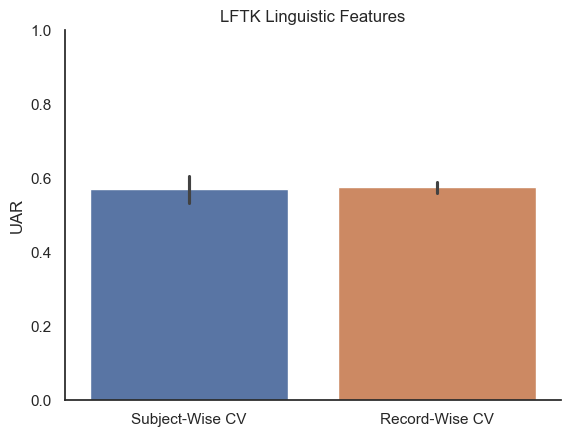

In [46]:
feature = 'lftk_classification'
a = pd.DataFrame.from_dict({
    'Subject-Wise CV': features_perf1[feature].mean(),
    'Record-Wise CV': features_perf2[feature].mean()
}).reset_index().rename(columns={"index": "Model"})
a

plt.title('LFTK Linguistic Features')
plt.ylim((0.0, 1.0))
plt.ylabel('UAR')
sns.despine()
sns.barplot(a)

In [47]:
 features_perf1[feature]

,RF,SVC,LogR,XGB
0,0.622917,0.589583,0.587500,0.600000
1,0.680556,0.509921,0.619048,0.674603
2,0.593254,0.626984,0.500000,0.593254
3,0.501089,0.478214,0.444444,0.592593
4,0.606618,0.436275,0.537990,0.599265


In [60]:
sns.set_context('talk')
sns.set_theme(style='white')

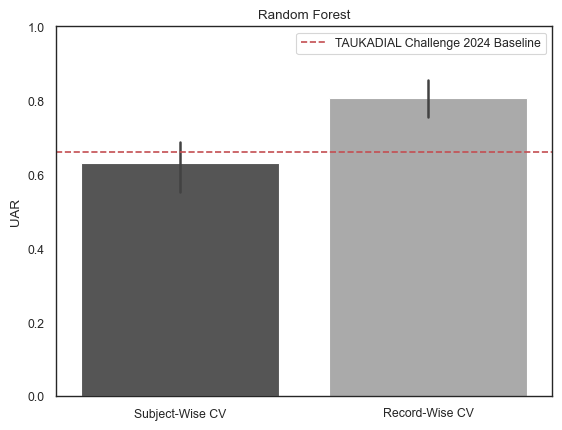

In [70]:
feature = 'egemaps_lftk_classification'
a = pd.DataFrame.from_dict({
    'Subject-Wise CV': features_perf1[feature]['RF'],
    'Record-Wise CV': features_perf2[feature]['RF']
})

plt.title('Random Forest')
plt.ylim((0.0, 1.0))
plt.ylabel('UAR')
# sns.despine()
sns.barplot(a, palette="grey",)
plt.axhline(y=0.66, color='r', linestyle='--', label='TAUKADIAL Challenge 2024 Baseline')
plt.legend()

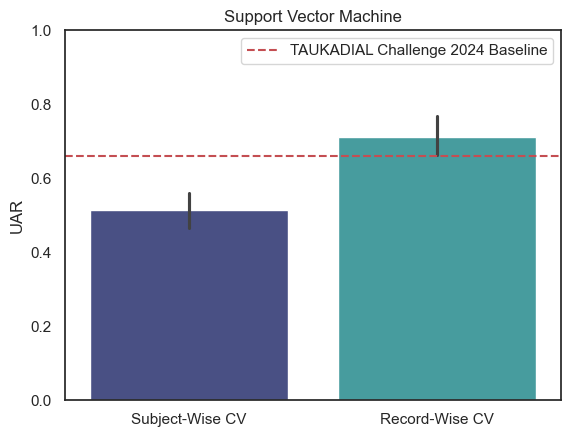

In [54]:
feature = 'egemaps_lftk_classification'
a = pd.DataFrame.from_dict({
    'Subject-Wise CV': features_perf1[feature]['SVC'],
    'Record-Wise CV': features_perf2[feature]['SVC']
})
a


plt.title('Support Vector Machine')
plt.ylim((0.0, 1.0))
plt.ylabel('UAR')
# sns.despine()
sns.barplot(a, palette="mako",)
plt.axhline(y=0.66, color='r', linestyle='--', label='TAUKADIAL Challenge 2024 Baseline')
plt.legend()

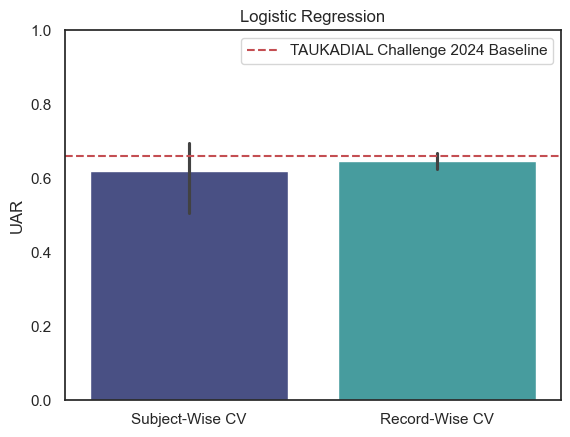

In [55]:
feature = 'egemaps_lftk_classification'
a = pd.DataFrame.from_dict({
    'Subject-Wise CV': features_perf1[feature]['LogR'],
    'Record-Wise CV': features_perf2[feature]['LogR']
})
a


plt.title('Logistic Regression')
plt.ylim((0.0, 1.0))
plt.ylabel('UAR')
# sns.despine()
sns.barplot(a, palette="mako",)
plt.axhline(y=0.66, color='r', linestyle='--', label='TAUKADIAL Challenge 2024 Baseline')
plt.legend()

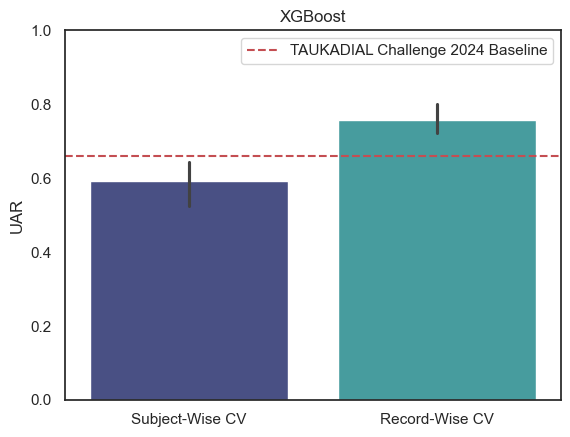

In [56]:
feature = 'egemaps_lftk_classification'
a = pd.DataFrame.from_dict({
    'Subject-Wise CV': features_perf1[feature]['XGB'],
    'Record-Wise CV': features_perf2[feature]['XGB']
})
a


plt.title('XGBoost')
plt.ylim((0.0, 1.0))
plt.ylabel('UAR')
# sns.despine()
sns.barplot(a, palette="mako",)
plt.axhline(y=0.66, color='r', linestyle='--', label='TAUKADIAL Challenge 2024 Baseline')
plt.legend()

<Axes: >

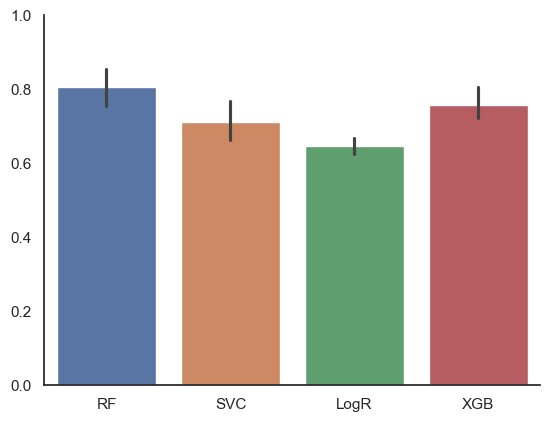

In [40]:
feature = 'egemaps_lftk_classification'
# plt.ylabel('UAR')
plt.ylim((0,1))
sns.despine()
sns.barplot(features_perf2[feature])

In [41]:
features_perf2[feature]

,RF,SVC,LogR,XGB
0,0.823232,0.740404,0.614141,0.722222
1,0.759596,0.635354,0.632323,0.718182
2,0.886364,0.806818,0.689394,0.848485
3,0.719697,0.678030,0.659091,0.731061
4,0.840909,0.689394,0.632576,0.768939
